In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import tkinter as tk
from tkinter import filedialog
from pandas import DataFrame
import datetime
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
# Set up the data
df = pd.read_csv('turnstile-usage-data-2018.csv', parse_dates=['Date'])

# Strip and make column names lowercase so that they are easy to manage. 
df.columns = df.columns.str.strip().str.lower()

# Replace characters or remove spaces and make all words lowercase.
df.columns = df.columns.str.replace(' ', '_').str.replace('/', '_').str.replace('(', '').str.replace(')', '')

#Sort data by C/A (equivalent to station), unit and scp (equivalent to a turnstile) 
# and date and time (in descending order)
df = df.sort_values(by=['c_a','unit', 'scp', 'date', 'time'],ascending = [True, True, True, False, False]).copy()

# What's inside the file? Let's take a preview.
column_names = list(df.columns.values) 
print(column_names)
print(df.head())

#Be aware, the file is big so this process will take some time.

['c_a', 'unit', 'scp', 'station', 'line_name', 'division', 'date', 'time', 'description', 'entries', 'exits']
        c_a  unit       scp station line_name division       date      time  \
54105  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  23:00:00   
54110  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  23:00:00   
44681  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  19:00:00   
44689  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  19:00:00   
35219  A002  R051  02-00-00   59 ST   NQR456W      BMT 2018-12-28  15:00:00   

      description  entries    exits  
54105     REGULAR  6889241  2335912  
54110     REGULAR  6889241  2335912  
44681     REGULAR  6888883  2335887  
44689     REGULAR  6888883  2335887  
35219     REGULAR  6888126  2335817  


In [6]:
df.describe()
#We are still working with the full dataset so runtime is a bit high. We'll cut that down shortly.

,entries,exits
count,1.011147e+07,1.011147e+07
mean,3.961658e+07,3.258595e+07
std,2.058149e+08,1.904601e+08
min,0.000000e+00,0.000000e+00
25%,4.929705e+05,2.377950e+05
50%,2.527592e+06,1.426439e+06
75%,6.916714e+06,4.814437e+06
max,2.144893e+09,2.146093e+09


Clearly there is too much data here; we have here approximately 10 million data points to work with. Perhaps we can benefit from looking at a subset of the data. Let's take a slice of our data.

In [7]:
# Set ipython's max row display
# Set iPython's max column width to 50
pd.set_option('display.max_columns', 50)

#List of unique values in the df['name'] column
for column_name in column_names:
    print("There are " + str(df[column_name].nunique()) + " unique values in column \'" + column_name + "\'.")

There are 749 unique values in column 'c_a'.
There are 470 unique values in column 'unit'.
There are 229 unique values in column 'scp'.
There are 379 unique values in column 'station'.
There are 114 unique values in column 'line_name'.
There are 6 unique values in column 'division'.
There are 350 unique values in column 'date'.
There are 85415 unique values in column 'time'.
There are 2 unique values in column 'description'.
There are 5701728 unique values in column 'entries'.
There are 5039144 unique values in column 'exits'.


In [8]:
#  Let's select the station that we're interested in.
station_name = "14 ST-UNION SQ"

# make new data frames to avoid hidden chaining
df_st = df[df.station == station_name].copy()
print(df_st.shape)

(81803, 11)


81803 values are a lot easier to deal with than 1.011147e+07
Let's get cracking...

In [9]:
#What's the data look like now?
df_st.head(20)

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
49748,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
40343,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
30261,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
18965,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048
9483,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048


We see that some entries are repeated. Let's get rid of those.

In [10]:
df_st1 = df_st.drop_duplicates().copy()
print(df_st1.shape, df_st1.shape)
print("We have removed", df_st.shape[0] - df_st1.shape[0], "duplicates")

(79966, 11) (79966, 11)
We have removed 1837 duplicates


We removed 1837 duplicate values in this dataframe.

In [11]:
df_st1.head()

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048


In [12]:
df_st1.head(20)
print(df_st1.shape)

#Let's remove non-regular entries from the dataframe. This will be names df_st2.
df_st2 = df_st1[df_st1["description"] == "REGULAR"].copy()
print(df_st2.shape)
df_st2.head(20)


(79966, 11)
(79468, 11)


,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits
49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086
40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313
30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665
18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145
9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048
3,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,00:00:00,REGULAR,2056268,5177036
107253,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,20:00:00,REGULAR,2056128,5176874
97629,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,16:00:00,REGULAR,2055677,5176081
87813,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,12:00:00,REGULAR,2055443,5175272
78212,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,08:00:00,REGULAR,2055373,5174751


In [13]:
# What's inside each column?
column_names2 = list(df_st2.columns.values) 
print(column_names2)

for column_name in column_names2:
    print("There are " + str(df_st2[column_name].nunique()) + " unique values in column \'" + column_name + "\'.")

['c_a', 'unit', 'scp', 'station', 'line_name', 'division', 'date', 'time', 'description', 'entries', 'exits']
There are 5 unique values in column 'c_a'.
There are 1 unique values in column 'unit'.
There are 38 unique values in column 'scp'.
There are 1 unique values in column 'station'.
There are 2 unique values in column 'line_name'.
There are 2 unique values in column 'division'.
There are 350 unique values in column 'date'.
There are 107 unique values in column 'time'.
There are 1 unique values in column 'description'.
There are 75421 unique values in column 'entries'.
There are 74644 unique values in column 'exits'.


Let's clean up the columns, removing columns we don't need and combining out date and time columns

In [19]:
df_st3 = df_st2.drop(columns=['station', 'line_name', 'division', 'description']).copy()

# Change format of date column to a string so that we can combine it with time column.
df_st3['date'] = df_st3['date'].apply(lambda x: x.strftime('%m/%d/%Y'))

# Create date_time column from 'date' and 'time' columns
df_st3['date_time'] = pd.to_datetime(df_st3.date + " " + df_st3.time, format="%m/%d/%Y %H:%M:%S")

df_st4 = df_st3.drop(columns=['date','time']).copy()

In [20]:
df_st4.head(10)

,c_a,unit,scp,entries,exits,date_time
49738,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00
40335,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00
30260,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00
18957,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00
9473,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00
3,A033,R170,02-00-00,2056268,5177036,2018-12-28 00:00:00
107253,A033,R170,02-00-00,2056128,5176874,2018-12-27 20:00:00
97629,A033,R170,02-00-00,2055677,5176081,2018-12-27 16:00:00
87813,A033,R170,02-00-00,2055443,5175272,2018-12-27 12:00:00
78212,A033,R170,02-00-00,2055373,5174751,2018-12-27 08:00:00


In [99]:
df_st5 = df_st4.copy()
# Add a column for day of week
df_st5['day_of_week'] = df_st5['date_time'].dt.weekday_name

# Add a column for year
df_st5['year'] = df_st5['date_time'].dt.year.copy()
df_st5.head()

,c_a,unit,scp,entries,exits,date_time,day_of_week,year
49738,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00,Friday,2018
40335,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00,Friday,2018
30260,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00,Friday,2018
18957,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00,Friday,2018
9473,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00,Friday,2018


In [101]:
df5 = df_st5.reset_index(drop=True).copy()
df5.head()

,c_a,unit,scp,entries,exits,date_time,day_of_week,year
0,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00,Friday,2018
1,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00,Friday,2018
2,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00,Friday,2018
3,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00,Friday,2018
4,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00,Friday,2018


In [102]:
df6 = df5.copy()
df_temp1 = df6.sort_values(by=['c_a','unit', 'scp', 'date_time'],ascending = [True, True, True, False]).copy()
df6.loc[:, "entries_diff"] = df_temp1.groupby(['c_a', 'unit', 'scp'], as_index=False)['entries'].diff(periods =-1).tolist()
df6.loc[:, "exits_diff"] = df_temp1.groupby(['c_a', 'unit', 'scp'], as_index=False)['exits'].diff(periods =-1).tolist()
df6.head()


,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff
0,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00,Friday,2018,327.0,773.0
1,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00,Friday,2018,202.0,648.0
2,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00,Friday,2018,87.0,520.0
3,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00,Friday,2018,12.0,97.0
4,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00,Friday,2018,6.0,12.0


In [103]:
# We are dropping entries that have entries_diff or exits_diff as 
# less than zero because those occur when turnstiles turnover. NAs are also dropped.

df6.drop(df6[(df6['entries_diff'] < 0)].index, inplace=True)
df6.drop(df6[(df6['exits_diff'] < 0)].index, inplace=True)

df7 = df6.dropna()
print(df7.shape, df6.shape, df5.shape)


(79418, 10) (79456, 10) (79468, 8)


We started with 79468 entries and ended with 79418 data entries after dropping turnstile turnover data and NA values; this was a reduction of 50 datapoints.

In [107]:
#Let's reset the index so that the dataframe can be easily searched by index now that things are organized.
df8 = df7.reset_index(drop=True)
df8.head()

,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff
0,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00,Friday,2018,327.0,773.0
1,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00,Friday,2018,202.0,648.0
2,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00,Friday,2018,87.0,520.0
3,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00,Friday,2018,12.0,97.0
4,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00,Friday,2018,6.0,12.0


In [108]:
# We have some abberant large values. Most of these records are spaced 4 hrs apart.
# 4 hrs = 14400 seconds; entries_diff or exits_diff counts of 4800 which would 
# approximate a person using a turnstile  every three seconds for a 4 hr block 
# is physically impossible. Using a metrocard and walking through the turnstile 
# takes longer than that.
# Lets check how many of those values we have.

print(df8[(df8['entries_diff' or 'exits_diff']>4800)].count())

c_a             96
unit            96
scp             96
entries         96
exits           96
date_time       96
day_of_week     96
year            96
entries_diff    96
exits_diff      96
dtype: int64


We see that 96 data points have either entries_diff or exits_diff greater than 4800.

In [109]:
# Let's see some examples of those values. We will then take a 
# sample index and check to see what was strange about that data entry.
df8[(df8['entries_diff']>4800)].head(10)

,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff
287,A033,R170,02-00-00,2001790,5046886,2018-11-10 00:00:00,Saturday,2018,8228.0,19262.0
630,A033,R170,02-00-00,1935565,4875650,2018-09-08 01:00:00,Saturday,2018,5924.0,15574.0
1632,A033,R170,02-00-00,1767794,4434817,2018-03-17 01:00:00,Saturday,2018,7675.0,19003.0
2379,A033,R170,02-00-01,1713899,2083653,2018-11-10 00:00:00,Saturday,2018,13792.0,15208.0
2722,A033,R170,02-00-01,1598345,1946721,2018-09-08 01:00:00,Saturday,2018,10926.0,13235.0
3722,A033,R170,02-00-01,1297661,1592920,2018-03-17 01:00:00,Saturday,2018,13512.0,14507.0
4469,A033,R170,02-00-02,14082080,13581042,2018-11-10 00:00:00,Saturday,2018,17034.0,18286.0
4811,A033,R170,02-00-02,13934847,13428367,2018-09-08 01:00:00,Saturday,2018,13304.0,13401.0
5813,A033,R170,02-00-02,13552547,13023128,2018-03-17 01:00:00,Saturday,2018,16524.0,18980.0
6559,A033,R170,02-00-03,5906609,6890294,2018-11-10 00:00:00,Saturday,2018,24408.0,28228.0


In [110]:
# The variable 'iv' stands for index value; it is the index value you 
# want to check to know how the datapoints look around that index (10 above and 10 below)
# Here we check index 15182
iv = 6559
df8[iv-10:iv+10]

,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff
6549,A033,R170,02-00-03,5909209,6893774,2018-11-11 16:00:00,Sunday,2018,479.0,586.0
6550,A033,R170,02-00-03,5908730,6893188,2018-11-11 12:00:00,Sunday,2018,96.0,387.0
6551,A033,R170,02-00-03,5908634,6892801,2018-11-11 08:00:00,Sunday,2018,16.0,46.0
6552,A033,R170,02-00-03,5908618,6892755,2018-11-11 04:00:00,Sunday,2018,85.0,37.0
6553,A033,R170,02-00-03,5908533,6892718,2018-11-11 00:00:00,Sunday,2018,383.0,237.0
6554,A033,R170,02-00-03,5908150,6892481,2018-11-10 20:00:00,Saturday,2018,724.0,753.0
6555,A033,R170,02-00-03,5907426,6891728,2018-11-10 16:00:00,Saturday,2018,558.0,766.0
6556,A033,R170,02-00-03,5906868,6890962,2018-11-10 12:00:00,Saturday,2018,145.0,551.0
6557,A033,R170,02-00-03,5906723,6890411,2018-11-10 08:00:00,Saturday,2018,20.0,88.0
6558,A033,R170,02-00-03,5906703,6890323,2018-11-10 04:00:00,Saturday,2018,94.0,29.0


We notice that entry 6559 is an outlier and the reason is quite obvious: the date between 6559 and 6600 is a difference of 8 days as opposed to the 4 hrs we expected. Trying this and other indexes alerted us that these large values should be removed since they don't reflect the 4 hr slots. Before we remove the values, lets see if we can calculate an average amount of entries per unit time.

In [111]:
df9 = df8.copy()
df_temp2 = df9.sort_values(by=['c_a','unit', 'scp', 'date_time'],ascending = [True, True, True, False]).copy()
df9.loc[:, "time_diff"] = df_temp2.groupby(['c_a', 'unit', 'scp'], as_index=False)['date_time'].diff(periods =-1).tolist() 
df9['time_diff'] = df9['time_diff'].apply(lambda x: x / pd.Timedelta('1 hour'))
df9.head()


,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff,time_diff
0,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00,Friday,2018,327.0,773.0,4.0
1,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00,Friday,2018,202.0,648.0,4.0
2,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00,Friday,2018,87.0,520.0,4.0
3,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00,Friday,2018,12.0,97.0,4.0
4,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00,Friday,2018,6.0,12.0,4.0


In [112]:
df10 = df9.copy()
df10.loc[:, "entries_per_hr"] = (df10['entries_diff']/df10['time_diff'])
df10.loc[:, "exits_per_hr"] = (df10['exits_diff']/df10['time_diff'])
df10.head()

,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff,time_diff,entries_per_hr,exits_per_hr
0,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00,Friday,2018,327.0,773.0,4.0,81.75,193.25
1,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00,Friday,2018,202.0,648.0,4.0,50.50,162.00
2,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00,Friday,2018,87.0,520.0,4.0,21.75,130.00
3,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00,Friday,2018,12.0,97.0,4.0,3.00,24.25
4,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00,Friday,2018,6.0,12.0,4.0,1.50,3.00


# Question: What turnstile had the highest average entries or exits per hour? What day did that take place?

In [134]:
df11 = df10.copy()
df12 = df11.sort_values(by='entries_per_hr', ascending=False).copy()
# Some time_diff are less than the standard 4 hrs, sometimes 
# within the range of minutes. We will exclude for entries where 
# the time_diff is less than 2 hr.
mask1 = df12['time_diff'] >= 2
df12[mask1].head(10)

,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff,time_diff,entries_per_hr,exits_per_hr
12292,A033,R170,02-00-05,13729398,5498557,2018-02-01 20:00:00,Thursday,2018,3383.0,108.0,4.0,845.75,27.00
12298,A033,R170,02-00-05,13721055,5496241,2018-01-31 20:00:00,Wednesday,2018,3351.0,105.0,4.0,837.75,26.25
10619,A033,R170,02-00-05,15431422,6187989,2018-11-29 20:00:00,Thursday,2018,3226.0,192.0,4.0,806.50,48.00
12304,A033,R170,02-00-05,13712847,5493875,2018-01-30 20:00:00,Tuesday,2018,3221.0,132.0,4.0,805.25,33.00
12262,A033,R170,02-00-05,13761214,5509129,2018-02-06 20:00:00,Tuesday,2018,3176.0,153.0,4.0,794.00,38.25
12268,A033,R170,02-00-05,13753629,5506678,2018-02-05 20:00:00,Monday,2018,3091.0,148.0,4.0,772.75,37.00
12286,A033,R170,02-00-05,13737740,5500978,2018-02-02 20:00:00,Friday,2018,3079.0,150.0,4.0,769.75,37.50
10509,A033,R170,02-00-05,15553010,6232705,2018-12-18 20:00:00,Tuesday,2018,3038.0,217.0,4.0,759.50,54.25
10542,A033,R170,02-00-05,15514330,6219114,2018-12-12 20:00:00,Wednesday,2018,3025.0,271.0,4.0,756.25,67.75
12256,A033,R170,02-00-05,13769010,5511468,2018-02-07 20:00:00,Wednesday,2018,3017.0,126.0,4.0,754.25,31.50


The top ten entries per hr all take place with the same turnstile (C/A A033, Unit R170, SCP 02-00-05). All of them occur between the 4:00 PM - 8:00 PM slots

In [135]:
df13 = df11.sort_values(by='exits_per_hr', ascending=False).copy()
mask2 = df13['time_diff'] >= 2
df13[mask2].head(10)

,c_a,unit,scp,entries,exits,date_time,day_of_week,year,entries_diff,exits_diff,time_diff,entries_per_hr,exits_per_hr
17087,A034,R170,03-00-00,1882267,14427387,2018-10-19 21:00:00,Friday,2018,177.0,3332.0,4.0,44.25,833.00
17011,A034,R170,03-00-00,1890024,14502602,2018-10-31 21:00:00,Wednesday,2018,375.0,3324.0,4.0,93.75,831.00
17745,A034,R170,03-00-00,1803452,13727884,2018-06-24 17:00:00,Sunday,2018,445.0,2965.0,4.0,111.25,741.25
16791,A034,R170,03-00-00,1915974,14769798,2018-12-14 20:00:00,Friday,2018,237.0,2901.0,4.0,59.25,725.25
16832,A034,R170,03-00-00,1911781,14722903,2018-12-07 20:00:00,Friday,2018,235.0,2888.0,4.0,58.75,722.00
16759,A034,R170,03-00-00,1919056,14801926,2018-12-19 20:00:00,Wednesday,2018,259.0,2809.0,4.0,64.75,702.25
17042,A034,R170,03-00-00,1886931,14472267,2018-10-26 21:00:00,Friday,2018,259.0,2698.0,4.0,64.75,674.50
18596,A034,R170,03-00-00,1719026,12837005,2018-01-26 20:00:00,Friday,2018,188.0,2696.0,4.0,47.00,674.00
16772,A034,R170,03-00-00,1917753,14787669,2018-12-17 20:00:00,Monday,2018,244.0,2691.0,4.0,61.00,672.75
16875,A034,R170,03-00-00,1907776,14677186,2018-11-30 20:00:00,Friday,2018,208.0,2670.0,4.0,52.00,667.50


The top ten exits per hr all take place with the same turnstile (C/A A033, Unit R170, SCP 03-00-00). This increased turnstile traffic all occur later in the day between 1PM-9PM, with most of our data surrounding the 4PM-8PM slots.

Text(0.5,1,'Busiest Turnstiles')

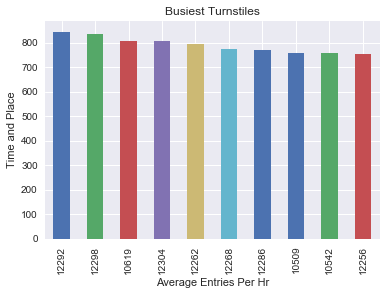

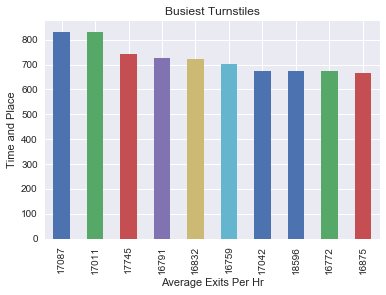

In [139]:
fig, ax = plt.subplots(figsize=(6,4))
df12[mask1][:10]['entries_per_hr'].sort_values(ascending=False).plot\
    (y = 'unit' + ' ' + 'scp' + ' ' + 'date_time', kind='bar', ax=ax)
ax.set_xlabel('Average Entries Per Hr')
ax.set_ylabel('Time and Place')
ax.set_title('Busiest Turnstiles')

fig, ax = plt.subplots(figsize=(6,4))
df13[mask2][:10]['exits_per_hr'].sort_values(ascending=False).plot\
    (y = 'unit' + ' ' + 'scp' + ' ' + 'date_time', kind='bar', ax=ax)
ax.set_xlabel('Average Exits Per Hr')
ax.set_ylabel('Time and Place')
ax.set_title('Busiest Turnstiles')

In [91]:
df11 = df10.copy()
df12 = df11.sort_values(by='time_diff', ascending=False)
mask1 = df12['time_diff'] >= 0
df12[mask1].head(300)

,c_a,unit,scp,entries,exits,date_time,entries_diff,exits_diff,time_diff,entries_per_hr,exits_per_hr
63017,R221,R170,01-03-01,10377264,14305760,2018-11-10 16:00:00,20882.0,32245.0,187.000000,111.668449,172.433155
65103,R221,R170,01-03-02,5256679,9012214,2018-11-10 16:00:00,23227.0,31778.0,187.000000,124.208556,169.935829
60932,R221,R170,01-03-00,23524722,29674407,2018-11-10 16:00:00,24224.0,27952.0,187.000000,129.540107,149.475936
39330,A035,R170,00-00-01,211251,765074,2018-03-17 01:00:00,1567.0,17623.0,181.000000,8.657459,97.364641
73458,R221,R170,01-06-01,9360,7154,2018-11-10 04:00:00,94.0,34.0,175.000000,0.537143,0.194286
72711,R221,R170,01-06-00,118794366,3158288,2018-03-17 01:00:00,12680.0,28939.0,173.000000,73.294798,167.277457
5813,A033,R170,02-00-02,13552547,13023128,2018-03-17 01:00:00,16524.0,18980.0,173.000000,95.514451,109.710983
43429,A035,R170,00-00-03,3101554,2571171,2018-03-17 01:00:00,16863.0,14438.0,173.000000,97.473988,83.456647
7903,A033,R170,02-00-03,5145363,6000799,2018-03-17 01:00:00,24220.0,29810.0,173.000000,140.000000,172.312139
76875,R221,R170,01-06-02,1399062,335719,2018-03-17 01:00:00,11968.0,4474.0,173.000000,69.179191,25.861272


In [51]:
#We will drop data points where entries_diff or exits_diff are > 4800.
df9 = df8.copy()
df9.drop(df9[(df9['entries_diff'] > 4800)].index, inplace=True)
df9.drop(df9[(df9['exits_diff'] > 4800)].index, inplace=True)
print(df8.shape,df9.shape)
df8.head()

(79418, 8) (79311, 8)


,c_a,unit,scp,entries,exits,date_time,entries_diff,exits_diff
0,A033,R170,02-00-00,2056902,5179086,2018-12-28 20:00:00,327.0,773.0
1,A033,R170,02-00-00,2056575,5178313,2018-12-28 16:00:00,202.0,648.0
2,A033,R170,02-00-00,2056373,5177665,2018-12-28 12:00:00,87.0,520.0
3,A033,R170,02-00-00,2056286,5177145,2018-12-28 08:00:00,12.0,97.0
4,A033,R170,02-00-00,2056274,5177048,2018-12-28 04:00:00,6.0,12.0


In [74]:
# The variable 'iv' stands for index value; it is the index value you 
# want to check to know how the datapoints look around that index (10 above and 10 below)
# Here we check index 15182
iv = 6559
df10[iv-10:iv+10]

,c_a,unit,scp,entries,exits,date_time,entries_diff,exits_diff,time_diff,entries_per_hr
6549,A033,R170,02-00-03,5909209,6893774,2018-11-11 16:00:00,479.0,586.0,4.0,119.750000
6550,A033,R170,02-00-03,5908730,6893188,2018-11-11 12:00:00,96.0,387.0,4.0,24.000000
6551,A033,R170,02-00-03,5908634,6892801,2018-11-11 08:00:00,16.0,46.0,4.0,4.000000
6552,A033,R170,02-00-03,5908618,6892755,2018-11-11 04:00:00,85.0,37.0,4.0,21.250000
6553,A033,R170,02-00-03,5908533,6892718,2018-11-11 00:00:00,383.0,237.0,4.0,95.750000
6554,A033,R170,02-00-03,5908150,6892481,2018-11-10 20:00:00,724.0,753.0,4.0,181.000000
6555,A033,R170,02-00-03,5907426,6891728,2018-11-10 16:00:00,558.0,766.0,4.0,139.500000
6556,A033,R170,02-00-03,5906868,6890962,2018-11-10 12:00:00,145.0,551.0,4.0,36.250000
6557,A033,R170,02-00-03,5906723,6890411,2018-11-10 08:00:00,20.0,88.0,4.0,5.000000
6558,A033,R170,02-00-03,5906703,6890323,2018-11-10 04:00:00,94.0,29.0,4.0,23.500000


In [137]:
# overwriting data after changing format 
#df4['time']= pd.to_datetime(df4["time"])
#df['date']= pd.to_datetime(df["date"])

# Make a column that puts the date and time info into one column in a processable format
#df4['date_time'] = pd.to_datetime()
df5 = df4.copy()
#print(df4.date.strftime('%X'))
df5['date'] = df5['date'].apply(lambda x: x.strftime('%m/%d/%Y'))
#print(df4.time.strftime('%x'))
#df5['time'] = df5['time'].apply(lambda x: x.strftime('%X'))

# Create date_time column from 'date' and 'time' cols
df5['date_time'] = pd.to_datetime(df5.date + " " + df5.time, format="%m/%d/%Y %H:%M:%S")

#df4['date_time'] = df4.strftime('%x') + df4.strf
df5.dtypes
df5.head(10)
#datetime.datetime.combine(df4.date, df.time) 
#dt.strftime(%X)




,index,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_diff,exits_diff,date_time
0,49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,20:00:00,REGULAR,2056902,5179086,327.0,773.0,2018-12-28 20:00:00
1,40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,16:00:00,REGULAR,2056575,5178313,202.0,648.0,2018-12-28 16:00:00
2,30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,12:00:00,REGULAR,2056373,5177665,87.0,520.0,2018-12-28 12:00:00
3,18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,08:00:00,REGULAR,2056286,5177145,12.0,97.0,2018-12-28 08:00:00
4,9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,04:00:00,REGULAR,2056274,5177048,6.0,12.0,2018-12-28 04:00:00
5,3,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/2018,00:00:00,REGULAR,2056268,5177036,140.0,162.0,2018-12-28 00:00:00
6,107253,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/2018,20:00:00,REGULAR,2056128,5176874,451.0,793.0,2018-12-27 20:00:00
7,97629,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/2018,16:00:00,REGULAR,2055677,5176081,234.0,809.0,2018-12-27 16:00:00
8,87813,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/2018,12:00:00,REGULAR,2055443,5175272,70.0,521.0,2018-12-27 12:00:00
9,78212,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/2018,08:00:00,REGULAR,2055373,5174751,12.0,105.0,2018-12-27 08:00:00


In [119]:
df5.head(10)

,index,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_diff,exits_diff
0,49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/18,20:00:00,REGULAR,2056902,5179086,327.0,773.0
1,40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/18,16:00:00,REGULAR,2056575,5178313,202.0,648.0
2,30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/18,12:00:00,REGULAR,2056373,5177665,87.0,520.0
3,18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/18,08:00:00,REGULAR,2056286,5177145,12.0,97.0
4,9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/18,04:00:00,REGULAR,2056274,5177048,6.0,12.0
5,3,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/28/18,00:00:00,REGULAR,2056268,5177036,140.0,162.0
6,107253,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/18,20:00:00,REGULAR,2056128,5176874,451.0,793.0
7,97629,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/18,16:00:00,REGULAR,2055677,5176081,234.0,809.0
8,87813,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/18,12:00:00,REGULAR,2055443,5175272,70.0,521.0
9,78212,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,12/27/18,08:00:00,REGULAR,2055373,5174751,12.0,105.0


In [ ]:
# FROM GARY: dt2 = dt.strftime('%x') + dt.strftime(' %X')

In [127]:
df.dtypes

c_a                    object
unit                   object
scp                    object
station                object
line_name              object
division               object
date           datetime64[ns]
time                   object
description            object
entries                 int64
exits                   int64
dtype: object

In [55]:
# Add a column for day of the week
#df4['day'] = datetime.df4['date_time'].strftime('%A')
df5['day_of_week'] = df5['date'].dt.weekday_name

# Add a column for year
df5['year'] = df5['date'].dt.year.copy()

df5.head()

,index,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_diff,exits_diff,date_time,day_of_week,year
0,49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,2019-07-29 20:00:00,REGULAR,2056902,5179086,327.0,773.0,2018-12-28,Friday,2018
1,40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,2019-07-29 16:00:00,REGULAR,2056575,5178313,202.0,648.0,2018-12-28,Friday,2018
2,30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,2019-07-29 12:00:00,REGULAR,2056373,5177665,87.0,520.0,2018-12-28,Friday,2018
3,18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,2019-07-29 08:00:00,REGULAR,2056286,5177145,12.0,97.0,2018-12-28,Friday,2018
4,9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,2019-07-29 04:00:00,REGULAR,2056274,5177048,6.0,12.0,2018-12-28,Friday,2018


In [56]:
df6 = df5[df5.year == 2018].copy()

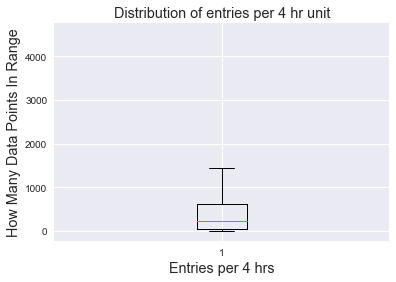

In [57]:
# Histogram of all entries by station for all 4 hr intervals
#plt.figure(figsize=(12,8))

plt.boxplot(df6.entries_diff)
# customize plot
plt.xlabel('Entries per 4 hrs', fontsize='large')
plt.ylabel('How Many Data Points In Range', fontsize='large')
plt.title('Distribution of entries per 4 hr unit', fontsize='large')

plt.show()

# What's the busiest day of the year?

In [65]:
df5 = df4.groupby('date').entries_diff.sum()

In [66]:
df5.sort_values(ascending = False)

#new_df = df.groupby(['user_ID','product_id'], sort=True).sum().reset_index()

date
2018-11-01    129793.0
2018-11-27    121697.0
2018-12-07    120030.0
2018-12-14    118339.0
2018-10-26    115986.0
2018-10-31    115848.0
2018-11-30    115605.0
2018-12-19    115400.0
2018-12-05    115103.0
2018-05-02    114285.0
2018-12-12    114157.0
2018-12-06    113986.0
2018-04-20    113835.0
2018-10-03    113687.0
2018-10-17    113605.0
2018-10-24    113478.0
2018-09-21    113460.0
2018-05-03    113329.0
2018-09-26    113308.0
2018-05-09    113290.0
2018-10-19    113289.0
2018-10-18    113024.0
2018-12-20    112967.0
2018-09-27    112911.0
2018-10-05    112798.0
2018-04-27    112740.0
2018-10-12    112735.0
2018-04-13    112733.0
2018-02-14    112578.0
2018-10-10    112368.0
                ...   
2018-11-18     56604.0
2018-07-08     56501.0
2018-08-19     56283.0
2018-07-29     55915.0
2018-02-04     55841.0
2018-08-05     55519.0
2018-11-23     55458.0
2018-02-10     55335.0
2018-07-15     55152.0
2018-05-13     54626.0
2018-05-28     54574.0
2018-08-26     54102.0
2018-1

In [67]:
df5 = df5.to_frame()
df5.head()

,entries_diff
date,
2018-01-01,47932.0
2018-01-02,79228.0
2018-01-03,95694.0
2018-01-04,57595.0
2018-01-05,79183.0


In [68]:
df6 = df4.groupby('date').exits_diff.sum()
df6 = df6.to_frame()
df6.head()

,exits_diff
date,
2018-01-01,49730.0
2018-01-02,74775.0
2018-01-03,84573.0
2018-01-04,47035.0
2018-01-05,76287.0


In [ ]:
df7 = pd.concat([df5, df6
gdate = pd.concat([gdate_entries, gdate_exits.exits_since_last_audit], axis = 1).copy()


In [148]:
df_station_cleaned2['year'] = df_station_cleaned2['date'].dt.year.copy()
df_station_2018 = df_station_cleaned2[df_station_cleaned2.year == 2018].copy()
print(df_station_2018.shape, df_station_cleaned2.shape, df_station_2018.shape[0] - df_station_cleaned2.shape[0])
#gdate = df_station_cleaned.groupby('date')
df_station_2018.head()
df_station_2018.reset_index()

(77426, 14) (79439, 14) -2013


,index,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_diff,exits_diff,year
0,49738,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,20:00:00,REGULAR,2056902,5179086,327.0,327.0,2018
1,40335,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,16:00:00,REGULAR,2056575,5178313,202.0,202.0,2018
2,30260,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,12:00:00,REGULAR,2056373,5177665,87.0,87.0,2018
3,18957,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,08:00:00,REGULAR,2056286,5177145,12.0,12.0,2018
4,9473,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,04:00:00,REGULAR,2056274,5177048,6.0,6.0,2018
5,3,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-28,00:00:00,REGULAR,2056268,5177036,140.0,140.0,2018
6,107253,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,20:00:00,REGULAR,2056128,5176874,451.0,451.0,2018
7,97629,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,16:00:00,REGULAR,2055677,5176081,234.0,234.0,2018
8,87813,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,12:00:00,REGULAR,2055443,5175272,70.0,70.0,2018
9,78212,A033,R170,02-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-12-27,08:00:00,REGULAR,2055373,5174751,12.0,12.0,2018


We have removed 2013 non-2018 entries from this dataframe.

In [145]:
df_station_2018.sort_values('entries_diff')

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_diff,exits_diff,year
1791513,R221,R170,01-03-01,14 ST-UNION SQ,456LNQRW,IRT,2018-10-27,13:00:00,REGULAR,10337442,14243928,0.0,0.0,2018
2907611,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-18,17:00:00,REGULAR,3,3303,0.0,0.0,2018
2912290,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-18,21:00:00,REGULAR,3,3303,0.0,0.0,2018
2858941,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-19,01:00:00,REGULAR,3,3303,0.0,0.0,2018
2863629,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-19,05:00:00,REGULAR,3,3303,0.0,0.0,2018
2868865,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-19,09:00:00,REGULAR,3,3303,0.0,0.0,2018
2873637,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-19,13:00:00,REGULAR,3,3303,0.0,0.0,2018
2878329,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-19,17:00:00,REGULAR,3,3303,0.0,0.0,2018
2883010,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-19,21:00:00,REGULAR,3,3303,0.0,0.0,2018
2830639,R221,R170,01-05-01,14 ST-UNION SQ,456LNQRW,IRT,2018-09-20,01:00:00,REGULAR,3,3303,0.0,0.0,2018


In [81]:
gdate_entries = df_station_2018.groupby(["date", "time"]).entries_since_last_audit.sum().reset_index().copy()
gdate_exits = df_station_2018.groupby(["date", "time"]).exits_since_last_audit.sum().reset_index().copy()


#gdate = df_station_2018.groupby(["date", "time"]).amount.sum().reset_index().sort_values("amount", ascending=False)
#gdate = df_station_2018.groupby(['date','time'])
gdate = pd.concat([gdate_entries, gdate_exits.exits_since_last_audit], axis = 1).copy()
gdate = gdate.sort_values("date", ascending=False)
gdate.head(40)


,date,time,entries_since_last_audit,exits_since_last_audit
2127,2018-12-28,20:00:00,26018.0,18237.0
2126,2018-12-28,16:00:00,19063.0,18993.0
2125,2018-12-28,12:00:00,7774.0,16034.0
2124,2018-12-28,11:09:45,787.0,1268.0
2123,2018-12-28,08:00:00,1794.0,6150.0
2122,2018-12-28,04:00:00,2559.0,904.0
2121,2018-12-28,00:00:00,15888.0,6068.0
2120,2018-12-27,20:00:00,31168.0,19600.0
2119,2018-12-27,16:00:00,20794.0,21533.0
2118,2018-12-27,12:00:00,-125481.0,-70424.0


In [ ]:
Before and After Box Plot of data points (show clean up)- range of entries per 4 hr unit

Bar graph of top ten days of the year

Pie Chart - Total Entries by Day of the Week (7 wedges)

groupby station:
    
    



Most # by station
\# by time frame
\# by line?

What are the busiest stations?
Where are people coming in? Where are people exiting?

Total by station?

What's the most busy data?

Further research:
    I would really like to know the gender of the people who are entering 

**PART 1

* What does your data contain and what is its background? 
This dataset is titled NYS Turnstile Data Usage and comes from the New York State Open Data project. It is maintained and updated by Kaggle and can be retrieved at this link: https://www.kaggle.com/new-york-state/nys-turnstile-usage-data/. The dataset we have executed our code on was downloaded on July 3rd, 2019.

As the title suggests, it contains the number of entries and exits of turnstiles from different stations. This data is organized my control area (C/A), unit, subunit-channel-position(SCP), line, division, date and time and is retrieved (usually) at 4 hr intervals. 

* Where does it come from? Why is it interesting or significant? 
A whole host of questions can be asked from this dataset, especially for determining what stations are most busy and in what direction (are people mostly leaving the station or mostly entering the station) and how that can fluxuate throughout the day.

* Conduct summary statistics and produce visualizations for the particular variables from the dataset that you will use.

* What variables does your data contain and what distributions do you think they have? 
Variables in my data are entries and exits and the rest of the columns allow us to arrange the data by place or time. 

* Does the data bear on the preliminary questions you wrote down? 

* What new questions might you answer? How does the data look when you plot it out?

**PART 2

* Ask three analytic questions and answer each one with a combination of statistics and visualizations. These analytic questions can focus on individuals behaviors or comparisons of the population.

Which station had the most entries
Which day was the busiest in each station
What time was the busiest in a particular day



In [143]:
#To determine issue: I wrote the code below to be able to 
#search by specific day and time and check for the root of the errors.

date = "2018-05-10"
time1 = "13:00:00"
time2 = "17:00:00"

df_date = df_station_2018[(df_station_2018["date"] == date)]
df_bytime1 = df_date[(df_date["time"] == time1)]
df_bytime2 = df_date[(df_date["time"] == time2)]
df_bytime = pd.concat([df_bytime1, df_bytime2]).copy()
df_bytime = df_bytime.sort_values(by=['station', 'scp', 'date', 'time'],ascending = [True, True, False, False])

df_bytime

,c_a,unit,scp,station,line_name,division,date,time,description,entries,exits,entries_since_last_audit,exits_since_last_audit,year
6393263,A035,R170,00-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,44060,84147,127.0,228.0,2018
6388609,A035,R170,00-00-00,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,43933,83919,72.0,207.0,2018
6393266,A035,R170,00-00-01,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,27893,96020,277.0,639.0,2018
6388611,A035,R170,00-00-01,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,27616,95381,120.0,663.0,2018
6393264,A035,R170,00-00-02,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,330147,740977,524.0,729.0,2018
6388610,A035,R170,00-00-02,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,329623,740248,192.0,1009.0,2018
6393262,A035,R170,00-00-03,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,3227781,2667396,922.0,338.0,2018
6388608,A035,R170,00-00-03,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,3226859,2667058,460.0,687.0,2018
6393265,A035,R170,00-00-04,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,17:00:00,REGULAR,893804,160005,1325.0,108.0,2018
6388607,A035,R170,00-00-04,14 ST-UNION SQ,LNQR456W,BMT,2018-05-10,13:00:00,REGULAR,892479,159897,903.0,221.0,2018


In [14]:
# If you wanted to save the new dataframe we had cleaned up, 
# starting with the subset of entries from a particular 
# station, we can execute the steps below 
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 200, height = 200, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def exportCSV ():
    global df_st1
    
    export_file_path = filedialog.asksaveasfilename(defaultextension='.csv')
    df_st1.to_csv (export_file_path, index = None, header=True)

saveAsButton_CSV = tk.Button(text='Export CSV', command=exportCSV, bg='white', fg='blue', font=('helvetica', 12, 'bold'))
canvas1.create_window(100, 100, window=saveAsButton_CSV)

root.mainloop()

# We could also try:
# export_csv = df.to_csv (r'new_data_2018.csv', index = None, header=True)
# This is just a fancier way, using a GUI to save the file in a way that users will be familiar with.
